24BAD128-Vibusha.G-Exp 3-Scenario 1
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
MSE: 200.95901199190564
RMSE: 14.176001269466141
R2 Score: 0.05002778385780371
study_hours : 0.2952716730279877
attendance 

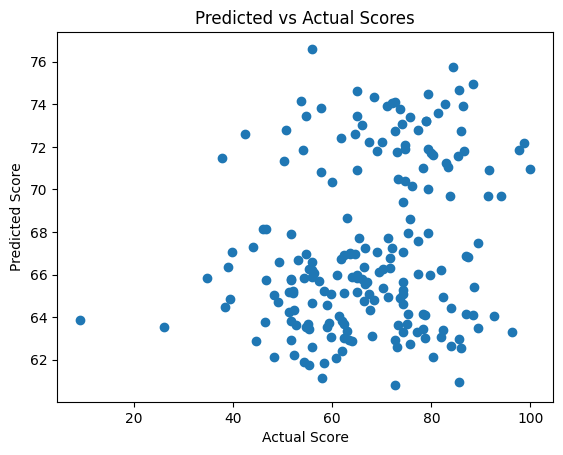

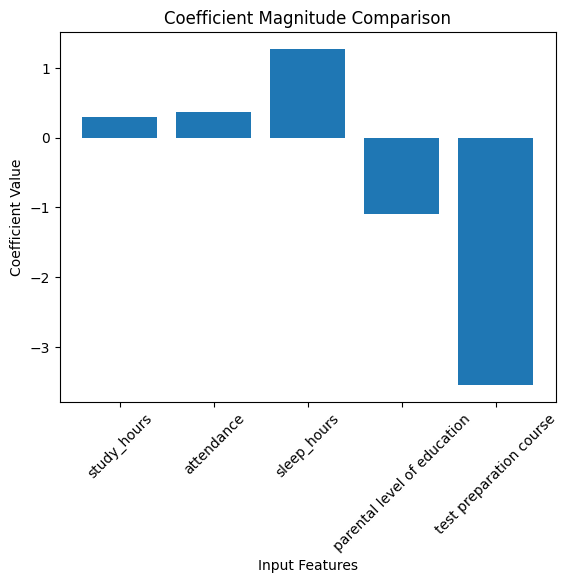

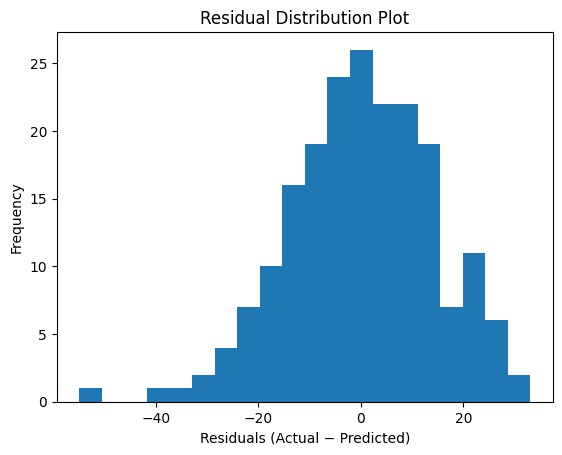

Ridge R2: 0.05005652706948205
Lasso R2: 0.05056142474377978


In [3]:
#from google.colab import files
#uploaded=files.upload()

#24BAD128-Vibusha.G-Exp 3-Scenario 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("24BAD128-Vibusha.G-Exp 3-Scenario 1")

path="StudentsPerformance.csv"
data = pd.read_csv(path)
print(data.head())

le = LabelEncoder()

data['parental level of education'] = le.fit_transform(
    data['parental level of education']
)

data['test preparation course'] = le.fit_transform(
    data['test preparation course']
)

#Target variable
data['final_score'] = (
    data['math score'] +
    data['reading score'] +
    data['writing score']
) / 3

np.random.seed(1)

data['study_hours'] = np.random.randint(1, 6, len(data))
data['attendance'] = np.random.randint(60, 100, len(data))
data['sleep_hours'] = np.random.randint(5, 9, len(data))

#Input Features
X = data[['study_hours',
          'attendance',
          'sleep_hours',
          'parental level of education',
          'test preparation course']]

y = data['final_score']

#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

for name, coef in zip(X.columns, model.coef_):
    print(name, ":", coef)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Scores")
plt.show()

plt.figure()
plt.bar(X.columns, model.coef_)
plt.xlabel("Input Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Magnitude Comparison")
plt.xticks(rotation=45)
plt.show()

# Residual Distribution Plot

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel("Residuals (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))

24BAD128-Vibusha.G-Scenario 2
----- MODEL PERFORMANCE -----

Degree 2
Train RMSE: 4.382306891578572
Test RMSE : 4.291499481069266
R² Score  : 0.6391701147013314

Degree 3
Train RMSE: 4.375361474747155
Test RMSE : 4.296541309265469
R² Score  : 0.6383217814053861

Degree 4
Train RMSE: 4.373350128219759
Test RMSE : 4.274134634619409
R² Score  : 0.6420842844016577


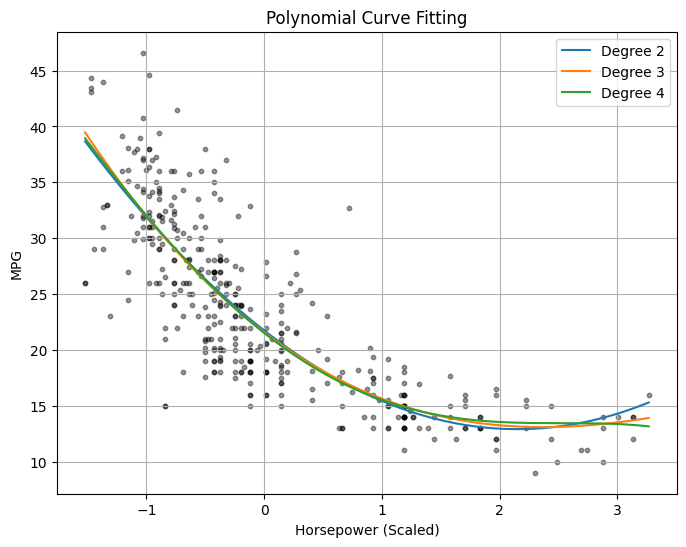

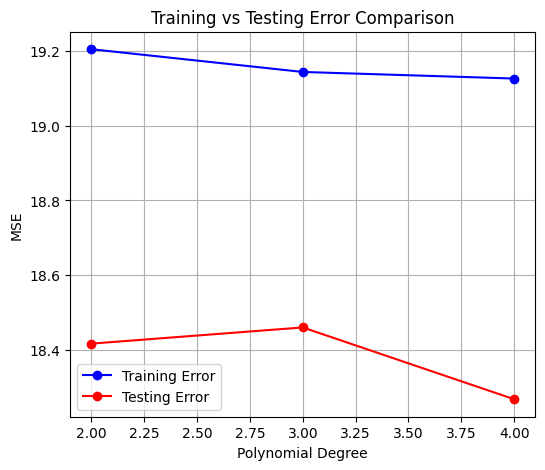


Ridge Regression (Degree 4)
Ridge R² Score: 0.6892806981874282


In [5]:
#from google.colab import files
#uploaded=files.upload()

#24BAD128-Vibusha.G-Scenario 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

print("24BAD128-Vibusha.G-Scenario 2")

path="auto-mpg.csv"
df = pd.read_csv(path,encoding='latin1')

df = df[['horsepower', 'mpg']]

df.replace("?", np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df.dropna(inplace=True)

X = df[['horsepower']]
y = df['mpg']

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

degrees = [2, 3, 4]
train_errors = []
test_errors = []

print("----- MODEL PERFORMANCE -----")

for d in degrees:

    # Generate polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluation
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2 = r2_score(y_test, y_test_pred)

    train_errors.append(mse_train)
    test_errors.append(mse_test)

    print(f"\nDegree {d}")
    print("Train RMSE:", rmse_train)
    print("Test RMSE :", rmse_test)
    print("R² Score  :", r2)

# Polynomial Curve Fitting-
plt.figure(figsize=(8,6))

X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1,1)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)

    y_plot = model.predict(poly.transform(X_plot))
    plt.plot(X_plot, y_plot, label=f"Degree {d}")

plt.scatter(X_scaled, y, color='black', s=10, alpha=0.4)
plt.xlabel("Horsepower (Scaled)")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.legend()
plt.grid(True)
plt.show()

# Training vs Testing Error
plt.figure(figsize=(6,5))
plt.plot(degrees, train_errors, marker='o', color='blue', label="Training Error")
plt.plot(degrees, test_errors, marker='o', color='red', label="Testing Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Ridge Regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, y)

ridge_pred = ridge.predict(X_poly)

print("\nRidge Regression (Degree 4)")
print("Ridge R² Score:", r2_score(y, ridge_pred))
